In [1]:
%matplotlib inline

# Datasets y Dataloaders

## Datasets

Pytorch proporciona los ``Datasets`` que són como bases de datos con nuestros datos de entrenamiento, en ellos se guardan los datos junto con sus etiquetas y sus correspondencias

Hay dos maneras de crear ``Datasets``, descargarlos de los conjuntos de datos de entrenamiento de Pytorch, o crearlos desde cero

### Creación de un Dataset a partir de un conjunto de datos de Pytorch

PyTorch proporcionan una serie de conjuntos de datos precargados que implementan funciones específicas para los datos. Se pueden utilizar para crear prototipos y comparar su modelo. Puede encontrarlos aquí:
 * [Conjuntos de datos de imagen](https://pytorch.org/vision/stable/datasets.html)
 * [Conjuntos de datos de texto](https://pytorch.org/text/stable/datasets.html)
 * [Conjuntos de datos de audio](https://pytorch.org/audio/stable/datasets.html)

A continuación, se muestra un ejemplo de cómo cargar el conjunto de datos ``Fashion-MNIST`` de TorchVision. ``Fashion-MNIST`` es un conjunto de datos de imágenes de artículos de Zalando que consta de 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba. Cada ejemplo comprende una imagen en escala de grises de 28×28 y una etiqueta asociada de una de las 10 posibles clases.

A la hora de crear un ``Dataset`` a partir de un conjunto de datos precargado de Pytorch tenemos cuatro parámetros que podemos modificar y son:
 * ``root``: es la ruta donde se van a almacenan los datos de train y test
 * ``train``: especifica si el conjunto de datos que se quiere descargar es el de entrenamiento o de prueba
 * ``download``: Por defecto es ``True``, descarga los datos de Internet si no están disponibles en ``root``.
 * ``transform`` y ``target_transform``: especifican las transformaciones de las características y etiquetas. Las transformaciones se explicarán más adelante

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

C:\Users\mfnunez\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Como se puede ver se han creado dos ``Dataset``s, uno de entrenamiento y otro de test. Los dos tienen sus datos en la carpeta data, en el de entrenamiento el parametro ``train`` es igual a ``True``, lo que indica que se descarguen los datos de entrenamiento, y en el de test el parámetro ``train`` es igual a ``False``, lo que indica que se descarguen los datos de test. Por último, en ambos dataset se ha indicado que se transformen los datos a tipo tensor.

Habíamos dicho que el conjunto de datos ``Fasion-MNIST`` constaba de 60.000 imágenes de entrenamiento y 10.000 imágenes de test, comprobemos si en nuestros ``Dataset``s se mantiene esto

In [4]:
len(training_data), len(test_data)

(60000, 10000)

Veamos una muestra

In [5]:
sample_training_data = training_data[0]
len(sample_training_data)

2

Vemos que la muestra tiene 2 items, esto es porque contiene la imágen y la etiqueta. Así que procedamos a separarlos para analizarlos

In [6]:
image_sample_training_data = sample_training_data[0]
image_sample_training_label = sample_training_data[1]
image_sample_training_data.shape, image_sample_training_label

(torch.Size([1, 28, 28]), 9)

Vemos que la imágen de la muestra tiene un tamaño de 1x28x28 píxeles, es decir, una imágen en blanco y negro de 28x28. Esta imágen corresponde a la prenda cuya etiqueta vale 9

Representemos varias muestras

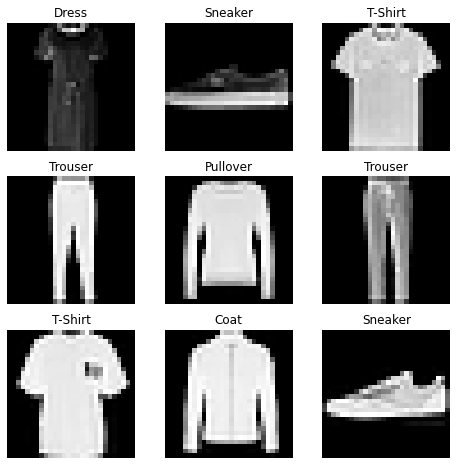

In [7]:
import matplotlib.pyplot as plt
from random import randint

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0, len(training_data)-1)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  
    # squeeze elimina todas las dimensiones 1 de un tensor, 
    # # si se le mete un tensor de dimensiones (Ax1xBxCx1xD) 
    # # devuelve un tensor de dimensiones (AxBxCxD)

plt.show()

### Creación de un Dataset personalizado

Ahora vamos a descargar el conjunto de datos ``MNIST`` que consiste en un conjunto de 60.000 imágenes de entrenamiento y 10.000 imágenes de test. Estas son imágenes en blanco y negro de números escritos a mano de tamáño 28x28.

Si se descargan de su [fuente original](http://yann.lecun.com/exdb/mnist/) se obtendrán una serie de listas de python con los valores de cada pixel de cada imagen. Así que lo que vamos a hacer es descargar el conjunto de este repositorio de [github](https://github.com/teavanist/MNIST-JPG) en el que han convertido esas listas a imágenes en formato JPG

In [8]:
import git
import os

url = "https://github.com/teavanist/MNIST-JPG"
to_path = "data/MNIST_JPG"

# Se comprueba si el directorio existe
if os.path.isdir(to_path):

    # Si existe, se comprueba si está vacío
    if not os.listdir(to_path):

        # Si está vacío se clona el repositorio
        git.repo.base.Repo.clone_from(url=url, to_path=to_path)

else:

    # Si no extiste se crea y se clona el repositorio
    os.mkdir(to_path)
    git.repo.base.Repo.clone_from(url=url, to_path=to_path)

Al descargar el repositorio tenemos un archivo .zip con las imágenes

In [9]:
os.listdir(to_path)

['.git',
 'MNIST Dataset JPG format',
 'MNIST Dataset JPG format.zip',
 'mnist_jpg.py',
 'README.md']

Lo descomprimimos

In [10]:
import zipfile

path_to_zip_file = to_path + '/' + "MNIST Dataset JPG format.zip"
directory_to_extract_to = to_path

if not os.path.isdir(to_path + "/" + "MNIST Dataset JPG format"):  # Se comprueba si ya se ha descomprimido antes
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

Una vez descomprimido vemos que tenemos una carpeta con las imágenes de train y otra con las de test, y dentro de cada una de ellas tenemos una carpeta con las imágenes de cada número. Ya podemos crear el ``Dataset`` personalizazo

Para crear un ``Dataset`` personalizado Pytorch nos pide que hagamos una clase con los 3 siguientes métodos: ``__init__``, `__len__` y `__getitem__`. Como es un ``Dataset`` personalizado no se puede generalizar mucho, por lo que lo explicaremos para este conjunto de datos para que se entienda la idea.

In [12]:
import pandas as pd

def createDataFrame(parent_dir):
    # Numero de labels
    N = 10

    # Se crea un diccionario con datos aleatorios para hacer un dataframe vacío
    diccionario = {
        "images names": pd.Series([""]),
        "path": pd.Series([""]),
        "label": pd.Series([0])
        }

    # Se crea un dataframe a partir del diccionario
    dataframe = pd.DataFrame(diccionario)

    # Se elimina la primera fila, así se tiene un datframe vacío
    dataframe.drop(dataframe.index[0], axis=0, inplace=True)

    # Se completa el dataframe
    for i in range (N):
        label = i
        images_dir = parent_dir + str(label) + "/"

        # Se crea una lista con las imágenes
        images_list = os.listdir(images_dir)

        # Se crea una serie a partir de la lista
        serie = pd.Series(images_list)

        # Se crea un sub dataframe a partir de la serie
        subdataframe = pd.DataFrame(serie, columns=["images names"])

        # Se añade una columna con el path de la imagen
        subdataframe["path"] = images_dir + subdataframe["images names"]

        # Se añade una columna con la etiqueta
        subdataframe["label"] = label

        # Se concatena el dataframe con el sub dataframe
        dataframe = pd.concat([dataframe, subdataframe], ignore_index=True)

    return dataframe

In [13]:
parent_dir = directory_to_extract_to+ '/' + "MNIST Dataset JPG format/MNIST - JPG - training/"
train_dataframe = createDataFrame(parent_dir)
train_dataframe.head(), len(train_dataframe)

(  images names                                               path  label
 0        1.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 1     1000.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 2    10005.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 3    10010.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 4    10022.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0,
 60000)

In [14]:
parent_dir = directory_to_extract_to+ '/' + "MNIST Dataset JPG format/MNIST - JPG - testing/"
test_dataframe = createDataFrame(parent_dir)
test_dataframe.head(), len(test_dataframe)

(  images names                                               path  label
 0       10.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 1     1001.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 2     1009.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 3      101.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0
 4     1034.jpg  data/MNIST_JPG/MNIST Dataset JPG format/MNIST ...      0,
 10000)

In [15]:
from skimage import io
import torch
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, images_dir, labels=None, train=True):
        self.images_dir = images_dir
        self.labels = labels
        self.train = train

    def __len__(self):
        return len(self.images_dir)

    def __getitem__(self, idx):
        img = io.imread(self.images_dir[idx])
        img = torch.from_numpy(img)

        if self.train:
            label = torch.tensor([self.labels[idx]]).item()
            return img, label
        else:
            return img

In [16]:
training_data = CustomImageDataset(images_dir=train_dataframe["path"], labels=train_dataframe["label"])
test_data = CustomImageDataset(images_dir=test_dataframe["path"], labels=test_dataframe["label"])

Vemos el número de mustras de entrenamiento y test

In [17]:
len(training_data), len(test_data)

(60000, 10000)

Veamos una muestra

In [18]:
sample_training_data = training_data[0]
len(sample_training_data)

2

Se puede ver que la dimensión de la muestra es 2, esto es porque la muestra contiene la imagen y la etiqueta, así que obtenemos solo la imagen

In [19]:
image_sample_training_data = sample_training_data[0]
image_sample_training_label = sample_training_data[1]
image_sample_training_data.shape, image_sample_training_label

(torch.Size([28, 28]), 0)

Vemos que la imágen de la muestra tiene un tamaño de 28x28 píxeles, es decir, una imágen en blanco y negro de 28x28. Esta imágen corresponde a la prenda cuya etiqueta vale 0

Representemos varias muestras

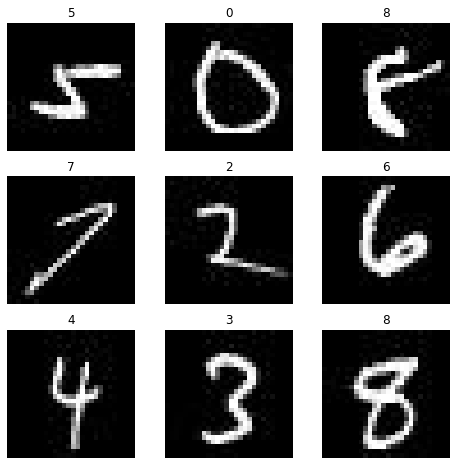

In [20]:
import matplotlib.pyplot as plt
from random import randint

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0, len(training_data)-1)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  
    # squeeze elimina todas las dimensiones 1 de un tensor, 
    # # si se le mete un tensor de dimensiones (Ax1xBxCx1xD) 
    # # devuelve un tensor de dimensiones (AxBxCxD)

plt.show()

## Dataloaders

Una vez tenemos el ``Dataset`` creado podemos crear *minibatches* muy facilmente mediante los ``Dataloader``s. El ``Dataloader`` iterará a través del ``Dataset``, cogiendo el número de muestras (*batch size*) que queramos. Además si queremos puede barajar los datos, es decir, los cogerá aleatoriamente, en vez de en el orden en el que está en el ``Dataset``, una vez ha pasado por todos los datos del ``Dataset``, si queremos volver a pasar el `Dataset` por la red neuronal, el orden será completamente distinto a la anterior vez.

In [21]:
from torch.utils.data import DataLoader

BS = 64

train_dataloader = DataLoader(training_data, batch_size=BS, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BS, shuffle=True)

### Iterar a través de un Dataloader

Podemos iterar a traves del ``Daaloader`` para obtener los *minibatches*

In [22]:
minibatch = next(iter(train_dataloader))
len(minibatch)

2

Como vemos el tamaño del minibatch es 2, tenemos por un lado las imágenes y por otro las etiquetas

In [27]:
train_features, train_labels = minibatch

train_features.shape, train_labels.shape

(torch.Size([64, 28, 28]), torch.Size([64]))

Ahora si podemos comrpobar como tenemos por un lado un minibatch con 64 imágenes de 28x28 píxeles y por otro lado 64 etiquetas